In [1]:
import numpy as np
import imutils
from matplotlib import pyplot as plt
import cv2

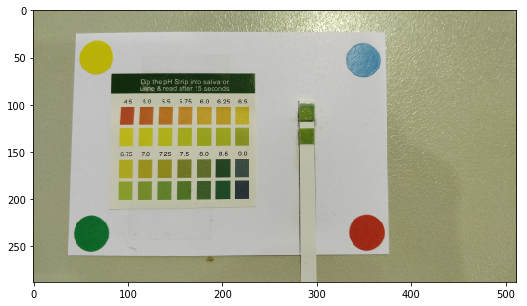

In [107]:
image = imutils.resize(cv2.imread('Data/IMG_20181103_102221.jpg'), width=512)
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [108]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

param1 = 30
param2 = 90
for i in range(0, 100, 1):
    par1 = param1+(i / 2 + i % 2)
    par2 = param2-(i / 2 + ((i + 1) % 2))
    circles = cv2.HoughCircles(gray_image,cv2.HOUGH_GRADIENT,1,20,
                            param1=par1,param2=par2,minRadius=5,maxRadius=50)
    # print(circles.shape if circles is not None else "None")
    if (circles is not None) and circles.shape[1] == 4:
        print(circles.shape)
        break
if not ((circles is not None) and circles.shape[1] == 4):
    print("Failed")

(1, 4, 3)


In [117]:
circled = image.copy()
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circled,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circled,(i[0],i[1]),1,(0,0,255),2)
    print(i)

[348  52  18]
[352 236  18]
[ 62 236  19]
[68 50 19]


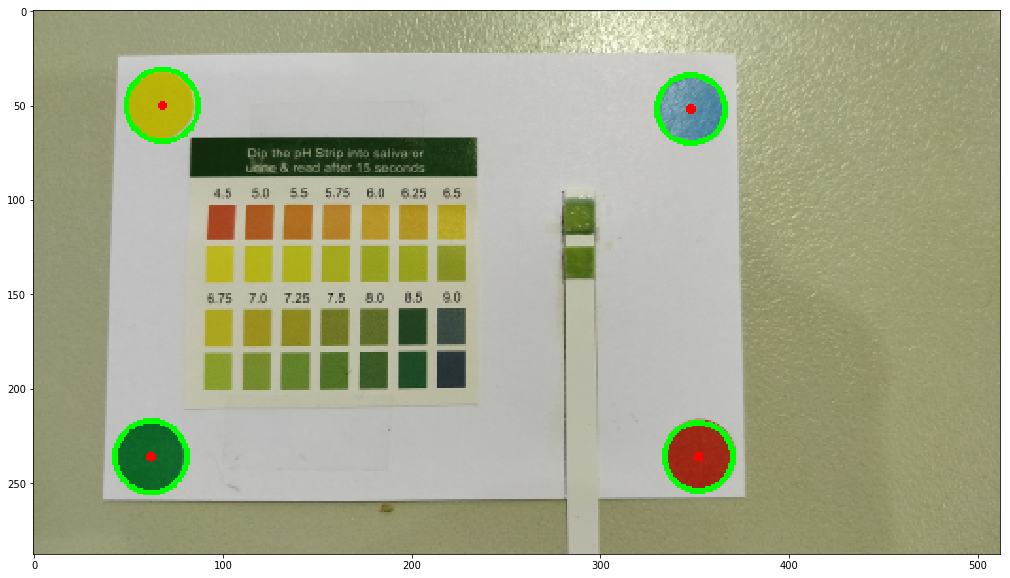

In [110]:
plt.figure(figsize=(18,10))
plt.imshow(cv2.cvtColor(circled, cv2.COLOR_BGR2RGB))
plt.show()

In [111]:
circles.shape

(1, 4, 3)

In [216]:
for i in circles[0,:]:
    print(i, image[i[1], i[0]])

[348  52  18] [174 156 109]
[352 236  18] [ 19  37 154]
[ 62 236  19] [38 98 14]
[68 50 19] [  7 176 184]


In [133]:
def crop_image(image, coords):
    print(coords)
    X_coords = [coord[1] for coord in coords]
    Y_coords = [coord[0] for coord in coords]
    radii = [coord[2] for coord in coords]
    radius = max(radii)
    x = min(X_coords) + radius
    X = max(X_coords) - radius
    y = min(Y_coords) + radius
    Y = max(Y_coords) - radius
    return image[x:X,y:Y]

[[348  52  18]
 [352 236  18]
 [ 62 236  19]
 [ 68  50  19]]


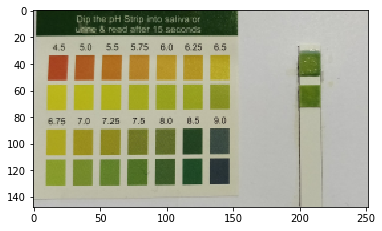

In [134]:
cropped = crop_image(image, circles[0,:])
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

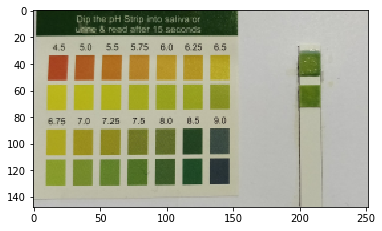

In [398]:
contoured = cropped.copy()

for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4:
        x_len = approx[2][0][0] - approx[0][0][0]
        y_len = approx[1][0][1] - approx[0][0][1]

        if x_len > 2 and y_len > 2:
            print(x_len, y_len)
            print(approx)
            cv2.drawContours(contoured,[cnt],0,(0,0,255),-1)

plt.imshow(cv2.cvtColor(contoured, cv2.COLOR_BGR2RGB))

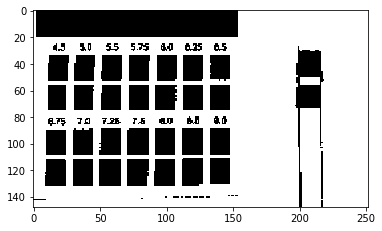

In [340]:
gray_image = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
g2 = cv2.medianBlur(gray_image,5)
th3 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

ret,thresh1 = cv2.threshold(gray_image,170,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)

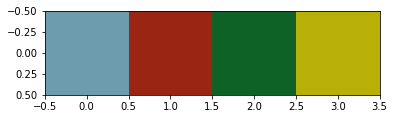

In [329]:
array = [[[174,156,109],
        [ 19,37,154],
        [38,98,14],
        [7,176,184]]]
array2 = [[list(reversed(v)) for v in array[0]]]
plt.imshow(array2)


In [232]:
list(reversed([7,176,184]))

[184, 176, 7]

In [343]:
array_match = np.array(array2)

In [393]:
yellow = [255,255,0]
blue = [65,105,225]
green = [50,205,50]
red = [255,0,0]
array_template = np.array([[yellow, blue, red, green]])

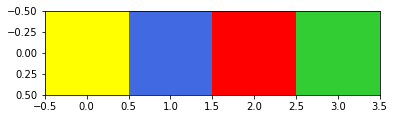

In [394]:
plt.imshow(array_template)

In [395]:
def color_dist(col_temp, col_match):
    return np.sum(np.abs(col_temp - col_match))        

In [396]:
import itertools

(3, 0, 1, 2)


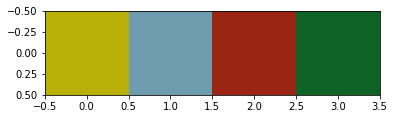

In [397]:
perm_list = list(itertools.permutations([0,1,2,3]))
distances_list = []
for perm in perm_list:
    total_dist = 0
    for i in range(4):
        total_dist += color_dist(array_match[0][perm[i]], array_template[0][i])
    distances_list.append(total_dist)
min_index = np.argmin(np.array(distances_list))
perm = perm_list[min_index]

new_col = []
for i in range(4):
    new_col.append(array_match[0][perm[i]])
print(perm)
plt.imshow([new_col])

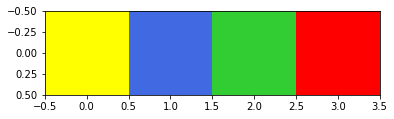

In [388]:
plt.imshow(array_template)

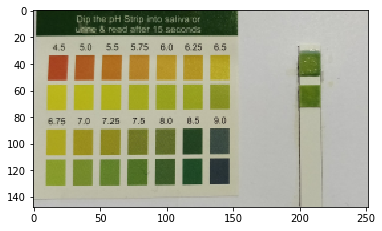

In [401]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

[[[166, 67, 33], [170, 89, 33], [177, 111, 33], [177, 127, 38], [183, 149, 43], [176, 146, 34], [180, 162, 36]], [[185, 180, 27], [180, 177, 24], [176, 176, 28], [162, 166, 29], [150, 159, 29], [151, 158, 29], [131, 140, 31]], [[172, 165, 31], [151, 139, 27], [139, 132, 27], [109, 113, 37], [98, 110, 45], [34, 65, 33], [57, 72, 65]], [[136, 154, 44], [115, 136, 41], [94, 126, 42], [79, 111, 38], [60, 89, 41], [29, 70, 36], [35, 46, 50]]]


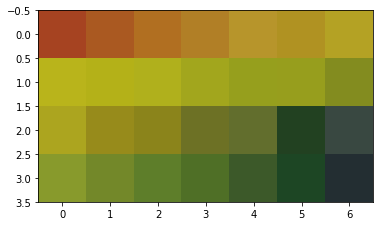

In [416]:
colors = []
for i, y in enumerate([42, 66, 98, 122]):
    colors.append([])
    for x in range(18, 150, 20):
        colors[i].append(list(reversed(cropped[y, x])))
plt.imshow(colors)
print(colors)

[[[94, 116, 35], [86, 111, 24]]]


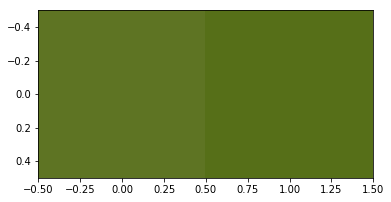

In [417]:
matches = [[list(reversed(cropped[40, 210])), list(reversed(cropped[60, 210]))]]
print(matches)
plt.imshow(matches)

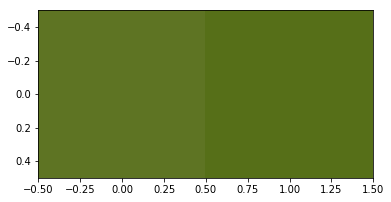